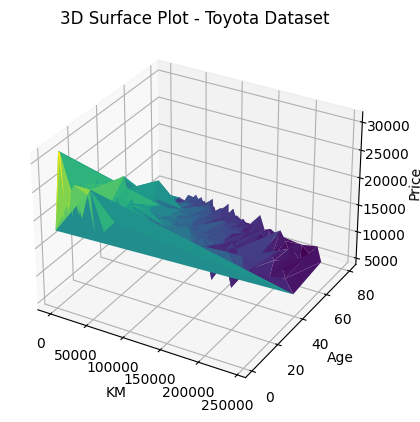

In [1]:
# Question 1a
# Visualize the n-dimensional data using 3D surface plots.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('Datasets/Toyota.csv').dropna()

# Select three columns as x, y, and z variables
x = [35000 if str(x).startswith('?') else float(x) for x in data['KM']]
y = [20 if str(x).startswith('?') else float(x) for x in data['Age']]
z = [12500 if str(x).startswith('?') else float(x) for x in data['Price']]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('KM')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
ax.set_title('3D Surface Plot - Toyota Dataset')

# Show the plot
plt.show()

In [1]:
# Question 1b
# Write a Python program to implement the Best First Search (BFS) algorithm.
import heapq

def best_first_search(graph, start, goal):
    # Initialize the priority queue with the start node
    frontier = [(0, start)]
    # Initialize the explored set
    explored = set()
    # Initialize the dictionary to keep track of the path and cost
    path_cost = {start: (None, 0)}
   
    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the highest priority
        (cost, current_node) = heapq.heappop(frontier)
       
        # Check if the current node is the goal
        if current_node == goal:
            # Construct the optimal path and compute the total cost
            path = []
            node = current_node
            while node is not None:
                path.append(node)
                node, _ = path_cost[node]
            path.reverse()
            total_cost = path_cost[current_node][1]
            return (path, total_cost)
       
        # Add the current node to the explored set
        explored.add(current_node)
       
        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node].items():
            # Compute the new cost and add it to the priority queue if the neighbor is not in the explored set and not in the frontier
            new_cost = neighbor_cost
            if neighbor not in explored and neighbor not in [node[1] for node in frontier]:
                heapq.heappush(frontier, (new_cost, neighbor))
                path_cost[neighbor] = (current_node, path_cost[current_node][1] + new_cost)
   
    # If the goal cannot be reached, return None
    return None

if __name__ == "__main__":
    # Get the graph as input from the user
    graph = {}
    n = int(input("Enter the number of edges: "))
    for i in range(n):
        source, dest, cost = input("Enter an edge (source dest cost): ").split()
        cost = int(cost)
        if source not in graph:
            graph[source] = {}
        if dest not in graph:
            graph[dest] = {}
        graph[source][dest] = cost
        graph[dest][source] = cost

    # Get start and goal nodes from the user
    start = input("Enter the start node: ")
    goal = input("Enter the goal node: ")

    # Run the Best First Search algorithm
    result = best_first_search(graph, start, goal)

    # Print the result
    if result is not None:
        path, total_cost = result
        print(f"The optimal path from {start} to {goal} is {path} with a total cost of {total_cost}.")
    else:
        print(f"There is no path from {start} to {goal}.")

The optimal path from A to I is ['A', 'B', 'E', 'I'] with a total cost of 18.


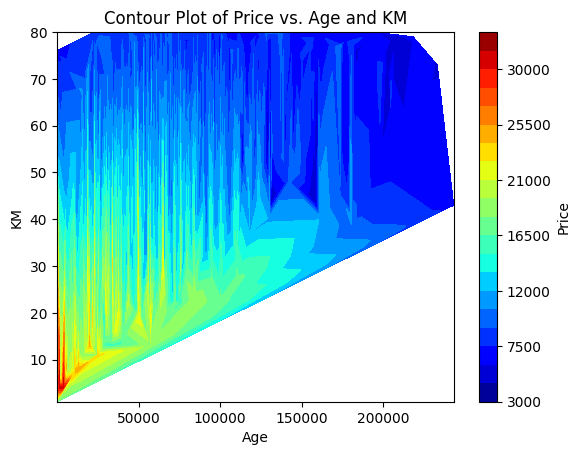

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('ML lab/ML lab/Toyota.csv')
data.head(5)
x = [35000 if str(x).startswith('?') else float(x) for x in data['KM']]
y = [20 if str(x).startswith('?') else float(x) for x in data['Age']]
z = [12500 if str(x).startswith('?') else float(x) for x in data['Price']]


# Create a contour plot
plt.tricontourf(x, y, z, levels=20, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('Age')
plt.ylabel('KM')
plt.title('Contour Plot of Price vs. Age and KM')
plt.show()

In [64]:
# Question 2b
# Write a program to implement the A* algorithm
import heapq

def a_star(graph, start, goal, heuristic):
    # Initialize the priority queue with the start node
    frontier = [(0 + heuristic[start], start)]
    # Initialize the cost dictionary with the start node
    cost = {start: 0}
    # Initialize the parent dictionary with the start node
    parent = {start: None}
    # Initialize the explored set
    explored = set()
    
    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the lowest f-score
        (f_score, current_node) = heapq.heappop(frontier)
        
        # Check if the current node is the goal
        if current_node == goal:
            # Reconstruct the path from the goal to the start
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return (path, cost[goal])
        
        # Add the current node to the explored set
        explored.add(current_node)
        
        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node]:
            # Calculate the tentative g-score
            tentative_g_score = cost[current_node] + neighbor_cost
            # Check if the neighbor is already in the explored set
            if neighbor in explored:
                # If the tentative g-score is higher than the current g-score, skip this neighbor
                if tentative_g_score >= cost.get(neighbor, float('inf')):
                    continue
            
            # Check if the neighbor is not in the frontier or the tentative g-score is lower than the current g-score
            if neighbor not in [node[1] for node in frontier] or tentative_g_score < cost.get(neighbor, float('inf')):
                # Update the cost and parent dictionaries
                cost[neighbor] = tentative_g_score # + heuristic[neighbor]
                parent[neighbor] = current_node
                # Add the neighbor to the frontier with its priority being its f-score
                heapq.heappush(frontier, (tentative_g_score + heuristic[neighbor], neighbor))
    
    # If the goal cannot be reached, return None
    return None

# Example graph
graph = {
    'A': [('B', 5), ('C', 6)],
    'B': [('D', 4), ('E', 7)],
    'C': [('F', 9), ('G', 8)],
    'D': [('H', 3)],
    'E': [('I', 6)],
    'F': [('J', 5)],
    'G': [('K', 7)],
    'H': [('L', 1)],
    'I': [('M', 2)],
    'J': [('N', 3)],
    'K': [('O', 4)],
    'L': [],
    'M': [],
    'N': [],
    'O': [('P', 1)],
    'P': []
}

# Heuristic function
heuristic = {
    'A': 10,
    'B': 8,
    'C': 7,
    'D': 6,
    'E': 8,
    'F': 3,
    'G': 2,
    'H': 5,
    'I': 6,
    'J': 3,
    'K': 2,
    'L': 1,
    'M': 4,
    'N': 2,
    'O': 4,
    'P': 0
}

# Get start and goal nodes from the user
start = input("Enter the start node: ")
goal = input("Enter the goal node: ")

# Run the Best First Search algorithm
result = a_star(graph, start, goal, heuristic)

# Print the result
if result is not None:
    print(f"The minimum cost from {start} to {goal} is {result}.")
else:
    print(f"There is no path from {start} to {goal}.")   

The minimum cost from A to G is (['A', 'C', 'G'], 16).


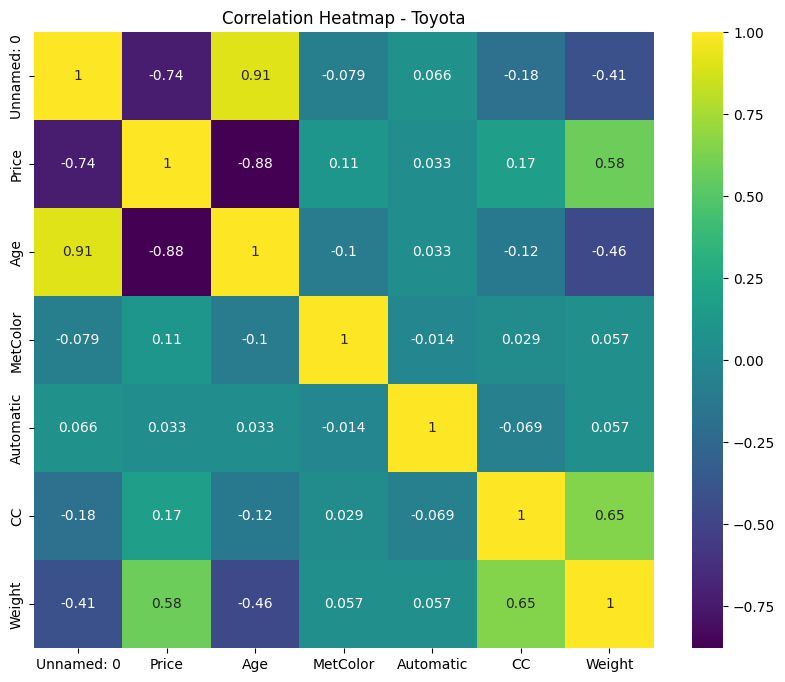

In [50]:
# Question 3a
# Visualize the n-dimensional data using heat-map.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Datasets/Toyota.csv')

# Select numerical columns for correlation matrix
numeric_columns = data.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='viridis')

# Set title and display the plot
plt.title('Correlation Heatmap - Toyota')
plt.show()

In [1]:
# Question 3b
# Write a program to implement Min-Max algorihm.
import math

def minimax(node, is_maximizing_player):
    if not node['children']:
        return node['value']

    if is_maximizing_player:
        best_value = -math.inf
        for child_node in node['children']:
            value = minimax(tree[child_node], False)
            if value > best_value:
                best_value = value
                best_child = child_node
        node['value'] = best_value
        return best_value
    else:
        best_value = math.inf
        for child_node in node['children']:
            value = minimax(tree[child_node], True)
            if value < best_value:
                best_value = value
                best_child = child_node
        node['value'] = best_value
        return best_value

def build_tree():
    # Prompt the user to enter the tree structure
    tree = {}
    while True:
        node_value = 0
        node_children = []
        node_label = input("Enter node label (or 'done' if finished): ")
        if node_label.lower() == 'done':
            break

        node_children = input(f"Enter node children for {node_label} (comma-separated, or leave blank for no children): ")
        if node_children:
            node_children = node_children.split(',')
        else:
            node_value = input(f"Enter node value for {node_label}: ")
            if node_value:
                node_value = int(node_value)
        
        tree[node_label] = {'value': node_value, 'children': node_children}

    return tree

def find_optimal_path(node, goal_value):
    if node['value'] == goal_value and not node['children']:
        return [k for k in tree if tree[k] == node]
    
    for child_label in node['children']:
        child_node = tree[child_label]
        path = find_optimal_path(child_node, goal_value)
        if path is not None:
            return [k for k in tree if tree[k] == node] + path

if __name__ == "__main__":
    tree = build_tree()
    
    # Find the optimal path to the goal node
    goal_value = minimax(tree['A'], True)
    optimal_path = find_optimal_path(tree['A'], goal_value)
    
    # Print the optimal path
    if optimal_path is not None:
        print("Optimal path:", "->".join(optimal_path))
    else:
        print("No optimal path found.")

Optimal path: A->B->D->I


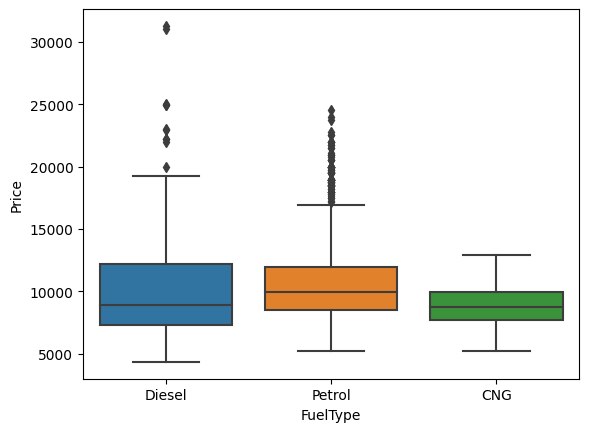

In [1]:
# Question 4a
# Visualize the n-dimensional data using Box-plot.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Datasets/Toyota.csv').dropna()

fueltype = data['FuelType'].unique()

sns.boxplot(x=data["FuelType"], y=data['Price'])
plt.xticks(range(len(fueltype)), fueltype)

plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Load the Titanic dataset
df = pd.read_csv('5/titanicc.csv')

# Preprocess the dataset
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.3,random_state=42)
# Split the dataset into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Define the Naive Bayes classifier class
class NaiveBayesClassifier:
    def __init__(self):
        self.prior = {}
        self.conditional = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute class priors
        for c in self.classes:
            self.prior[c] = np.mean(y == c)

        # Compute conditional probabilities
        for feature in X.columns:
            self.conditional[feature] = {}
            for c in self.classes:
                feature_values = X[feature][y == c]
                self.conditional[feature][c] = {
                    'mean': np.mean(feature_values),
                    'std': np.std(feature_values)
                }

    def predict(self, X):
        y_pred = []
        for _, sample in X.iterrows():
            probabilities = {}
            for c in self.classes:
                probabilities[c] = self.prior[c]
                for feature in X.columns:
                    mean = self.conditional[feature][c]['mean']
                    std = self.conditional[feature][c]['std']
                    x = sample[feature]
                    probabilities[c] *= self._gaussian_pdf(x, mean, std)
            y_pred.append(max(probabilities, key=probabilities.get))
        return y_pred

    @staticmethod
    def _gaussian_pdf(x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Instantiate and train the Naive Bayes classifier
classifier=NaiveBayesClassifier()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
accuracy=np.mean(y_pred==Y_test)
print("Accuracy ",accuracy)


Confusion Matrix
[[131  26]
 [ 62  49]]
Accuracy  0.6716417910447762


In [1]:
# Question 6
# Write a program to develop the KNN classifier with Euclidean distance for the k values as 3 based on split up of training and testing dataset as 70-30 on Glass dataset.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load Glass dataset
glass = pd.read_csv("Datasets/Glass.csv")
glass_X = glass.drop("Type", axis=1)
glass_y = glass["Type"]

# Define distance metrics
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def KNN_classifier(X_train, y_train, X_test, k, distance_metric):

    y_pred = []
    for i in range(X_test.shape[0]):
        # distances = cdist(X_train, [X_test.iloc[i]], metric=distance_metric)        # Alternate
        distances = [euclidean_distance(X_test.iloc[i].values, x_train) for x_train in X_train.values]
        nearest_indices = np.argsort(distances, axis=0)[:k].flatten()
        nearest_labels = y_train.iloc[nearest_indices]
        label_counts = np.bincount(nearest_labels)
        predicted_label = np.argmax(label_counts)
        y_pred.append(predicted_label)
    return y_pred

X_train, X_test, y_train, y_test = train_test_split(glass_X,glass_y, test_size=0.3, random_state=42)
print(f"Results for Glass dataset using 70-30 split and Euclidean distance:")
k=3
y_pred = KNN_classifier(X_train, y_train, X_test, k, euclidean_distance)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"k={k}: Accuracy = {accuracy}")
# print(f"k={k}: Accuracy = {accuracy_score(y_test, y_pred)}")        # Alternate

Results for Glass dataset using 70-30 split and Euclidean distance:
k=3: Accuracy = 0.6461538461538462


In [1]:
# Question No 7
# Write a program to develop the KNN classifier with Manhattan distance for the k values as 5 based on split up of training and testing dataset as 80-20 on Fruit dataset.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load Fruit dataset
fruit = pd.read_csv("Datasets/Fruit.csv")
fruit_X = fruit.drop(["fruit_label", "fruit_name", "fruit_subtype"], axis=1)
fruit_y = fruit["fruit_label"]

# Define distance metrics
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Define KNN classifier
def KNN_classifier(X_train, y_train, X_test, k, distance_metric):

    y_pred = []

    for i in range(X_test.shape[0]):
        # distances = cdist(X_train, [X_test.iloc[i]], metric=distance_metric)        # Alternate
        distances = [manhattan_distance(X_test.iloc[i].values, x_train) for x_train in X_train.values]
        nearest_indices = np.argsort(distances, axis=0)[:k].flatten()
        nearest_labels = y_train.iloc[nearest_indices]
        label_counts = np.bincount(nearest_labels)
        predicted_label = np.argmax(label_counts)
        y_pred.append(predicted_label)

    return y_pred

# Define function to split dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(fruit_X,fruit_y, test_size=0.2, random_state=12)
print(f"Results for Fruit dataset using 80-20 split and Manhattan distance:")
k=5
y_pred = KNN_classifier(X_train, y_train, X_test, k, manhattan_distance)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"k={k}: Accuracy = {accuracy}")
# print(f"k={k}: Accuracy = {accuracy_score(y_test, y_pred)}")        # Alternate      

Results for Fruit dataset using 80-20 split and Manhattan distance:
k=5: Accuracy = 0.75



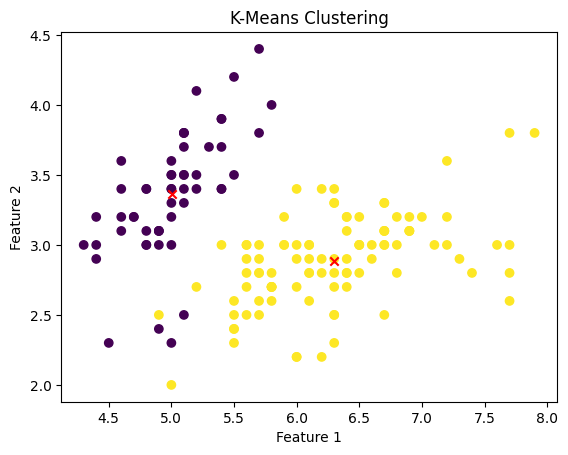

In [46]:
# Question no 8
# Write a program to perform unsupervised K-means clustering techniques on Iris dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def fit(self, X):
        self.centroids = X[np.random.choice(range(X.shape[0]), self.n_clusters, replace=False)]
       
        for _ in range(self.max_iterations):
            # Assign points to the nearest centroid
            distances = self.calculate_distances(X)
            labels = np.argmin(distances, axis=1)
           
            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
           
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
           
            self.centroids = new_centroids

        return labels

    def calculate_distances(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return distances

# Set the random seed for reproducibility
np.random.seed(42)

data = pd.read_csv('Datasets/Iris.csv')
X = data.iloc[:, :-1].values

# Perform k-means clustering
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')#rem
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='red')#rem
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Single-linkage proximity matrix:

[[  0.           1.13578167   2.06397674 ... 147.08123606 148.08656252
  149.07092272]
 [  1.13578167   0.           1.04403065 ... 146.08299011 147.08929261
  148.07177314]
 [  2.06397674   1.04403065   0.         ... 145.08869701 146.09418195
  147.07644271]
 ...
 [147.08123606 146.08299011 145.08869701 ...   0.           1.17473401
    2.1       ]
 [148.08656252 147.08929261 146.09418195 ...   1.17473401   0.
    1.26095202]
 [149.07092272 148.07177314 147.07644271 ...   2.1          1.26095202
    0.        ]]

Complete-linkage proximity matrix:

[[  0.           1.13578167   2.06397674 ... 147.08123606 148.08656252
  149.07092272]
 [  1.13578167   0.           1.04403065 ... 146.08299011 147.08929261
  148.07177314]
 [  2.06397674   1.04403065   0.         ... 145.08869701 146.09418195
  147.07644271]
 ...
 [147.08123606 146.08299011 145.08869701 ...   0.           1.17473401
    2.1       ]
 [148.08656252 147.08929261 146.09418195 ...   1.1747340

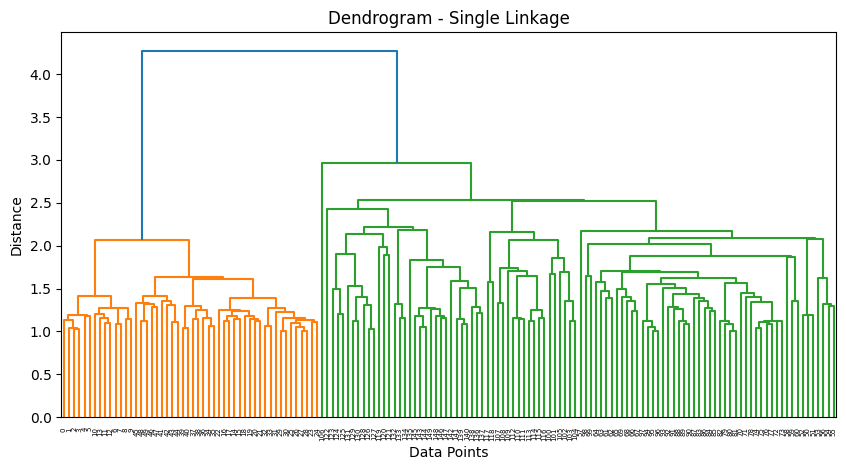

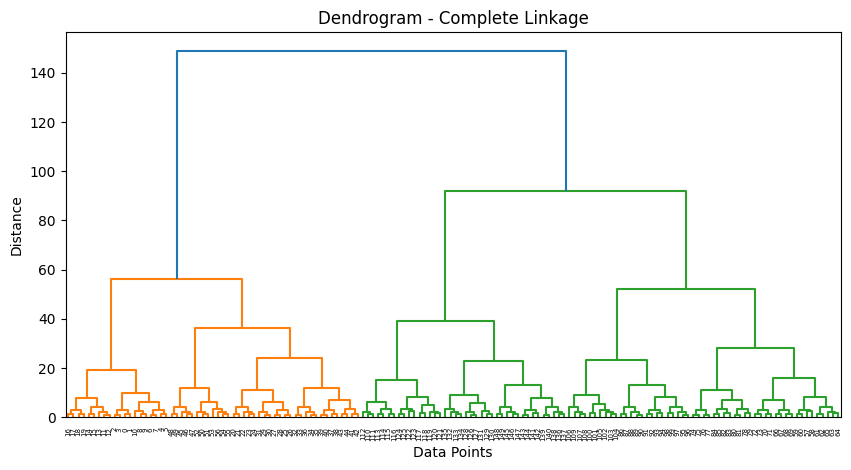

In [1]:
# Question 9
# Write a program to perform agglomerative clustering based on single-linkage, complete-linkage criteria.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = pd.read_csv('Datasets/Iris.csv')
iris['Species'] = iris['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris = iris.values

# Function to calculate the proximity matrix based on single-linkage
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Function to calculate the proximity matrix based on complete-linkage
def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Calculate the proximity matrix using single-linkage
single_linkage_matrix = single_linkage(iris)
print("Single-linkage proximity matrix:\n")
print(single_linkage_matrix)

# Calculate the proximity matrix using complete-linkage
complete_linkage_matrix = complete_linkage(iris)
print("\nComplete-linkage proximity matrix:\n")
print(complete_linkage_matrix)

# Plot the dendrogram using single-linkage
linkage_matrix = linkage(iris, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Plot the dendrogram using complete-linkage
linkage_matrix = linkage(iris, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [1]:
# Question 10
# Write a program to develop a decision tree classifier based on weather forecasting dataset.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Tree_Node:
    def __init__(self, feature_name, IG):
        self.feature = feature_name
        self.IG = IG

def calculate_entropy(data):
    labels = {}
    for record in data:
        label = record[-1]
        if label not in labels:
            labels[label] = 0
        labels[label] += 1

    entropy = 0.0
    for label in labels:
        probability = float(labels[label]) / len(data)
        entropy -= probability * np.log2(probability)

    return entropy

def split_data(data, attribute, value):
    subset = []
    for record in data:
        if record[attribute] == value:
            reduced_record = record[:attribute]
            reduced_record.extend(record[attribute + 1:])
            subset.append(reduced_record)

    return subset

def select_best_attribute(data):
    num_attributes = len(data[0]) - 1
    total_entropy = calculate_entropy(data)
    best_information_gain = 0.0
    best_attribute = -1

    for attribute in range(num_attributes):
        attribute_values = np.unique([record[attribute] for record in data])
        attribute_entropy = 0.0

        for value in attribute_values:
            subset = split_data(data, attribute, value)
            probability = len(subset) / float(len(data))
            attribute_entropy += probability * calculate_entropy(subset)
            # print(f'{value} => {attribute_entropy}')

        information_gain = total_entropy - attribute_entropy
        if information_gain > best_information_gain:
            best_information_gain = information_gain
            best_attribute = attribute

    return (best_information_gain, best_attribute)

def majority_vote(data):
    labels = {}
    for record in data:
        label = record[-1]
        if label not in labels:
            labels[label] = 0
        labels[label] += 1

    majority_label = None
    max_count = 0
    for label in labels:
        if labels[label] > max_count:
            max_count = labels[label]
            majority_label = label

    return majority_label

def create_decision_tree(data, attributes):
    class_values = [record[-1] for record in data]

    # Base cases
    if len(np.unique(class_values)) == 1:
        return class_values[0]
    if len(attributes) == 0:
        return majority_vote(data)

    info_gain, best_attribute = select_best_attribute(data)
    best_attribute_label = Tree_Node(attributes[best_attribute], info_gain)
    # print(f'{best_attribute_label} =>  IG:{info_gain}')

    tree = {best_attribute_label: {}}
    remaining_attributes = attributes[:best_attribute] + attributes[best_attribute + 1:]

    attribute_values = np.unique([record[best_attribute] for record in data])
    for value in attribute_values:
        subset = split_data(data, best_attribute, value)
        if len(subset) == 0:
            return majority_vote(data)
        subtree = create_decision_tree(subset, remaining_attributes)
        tree[best_attribute_label][value] = subtree

    return tree

def classify(record, tree):
    if isinstance(tree, str):
        return tree
    if isinstance(tree, bool):
        return majority_vote(record)

    root = next(iter(tree))
    attribute_index = attributes.index(root.feature)
    attribute_value = record[attribute_index]
    if attribute_value not in tree[root]:
        return majority_vote(record)

    subtree = tree[root][attribute_value]
    return classify(record, subtree)

def print_decision_tree(tree, indent=''):
    if isinstance(tree, str):
        print(tree)
    else:
        root = next(iter(tree))
        subtree = tree[root]
        for value, sub_tree in subtree.items():
            if isinstance(sub_tree, dict):
                print(f"{indent}if {root.feature} (IG:{root.IG:.3f}) = {value}:".title())
                print_decision_tree(sub_tree, indent + "  ")
            else:
                print(f"{indent}if {root.feature} (IG:{root.IG:.3f}) = {value}: {sub_tree}".title())

if __name__ == '__main__':
    # Read data from CSV file
    data = pd.read_csv('Datasets/weather.csv')

    # Split features and labels
    features = data.drop('play', axis=1)    #data.iloc[:, :-1]
    labels = data['play']                   #data.iloc[:, -1]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=(3/14), random_state=54)
    # print(X_test,y_test)

    # Extract attribute names
    attributes = list(features.columns)

    # Create decision tree
    train_data = np.concatenate([X_train.values, y_train.values.reshape(-1, 1)], axis=1)
    decision_tree = create_decision_tree(train_data.tolist(), attributes)

    # Predict test data
    y_pred = []
    for record in X_test.values.tolist():
        prediction = classify(record, decision_tree)
        y_pred.append(prediction)

    # Compare with actual labels and print accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Predicted labels:", y_pred)
    print("Actual labels   :", y_test.tolist())
    print("Accuracy Score  :", accuracy)

    # Print the decision tree
    print("\nGenerated Decision Tree:\n")
    print_decision_tree(decision_tree)

Predicted labels: ['yes', 'yes', 'no']
Actual labels   : ['yes', 'yes', 'no']
Accuracy Score  : 1.0

Generated Decision Tree:

If Outlook (Ig:0.332) = Overcast: Yes
If Outlook (Ig:0.332) = Rainy:
  If Windy (Ig:1.000) = False: Yes
  If Windy (Ig:1.000) = True: No
If Outlook (Ig:0.332) = Sunny:
  If Humidity (Ig:0.918) = High: No
  If Humidity (Ig:0.918) = Normal: Yes


(150, 4)
(150, 2)


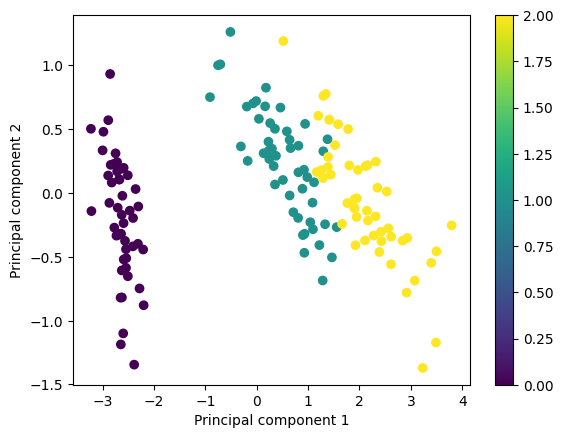

In [43]:
# Question 11a
# Write a program to develop Principal Component Analysis (PCA) algorithms.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, colormaps as cm

class PCA:

    def __init__(self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None

    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.components = eigenvectors[:self.n_components]

    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)
    
if __name__ == "__main__":
    data=pd.read_csv('Datasets/IRIS.csv')
    X=data.drop('species',axis=1).values
    y=data['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).values
    pca=PCA(2)
    pca.fit(X)
    X_projected = pca.transform(X)
    print(X.shape)
    print(X_projected.shape)
    x1=X_projected[:,0]
    x2=X_projected[:,1]
    plt.scatter(x1,x2,c=y,cmap="viridis")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.colorbar()
    plt.show()

(150, 4)
(150, 2)


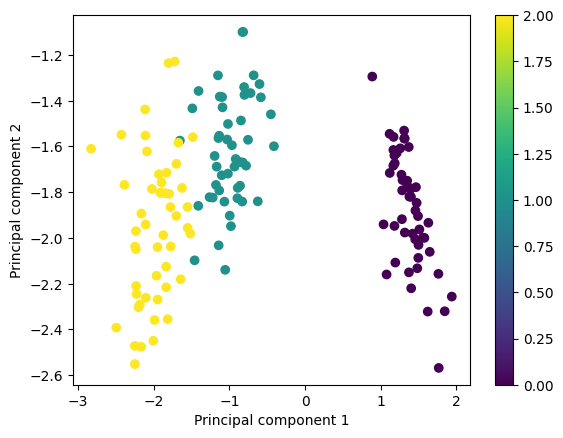

In [48]:
# Question 11b
# Write a program to develop Linear Discriminant Analysis (LDA) algorithms
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, colormaps as cm

class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0) #mnc
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)

            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            SB += n_c * (mean_diff).dot(mean_diff.T)
        A = np.linalg.inv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)
    
if __name__ == "__main__":
    data=pd.read_csv('Datasets/IRIS.csv')
    X=data.drop('species',axis=1).values
    y=data['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).values
    lda=LDA(2)
    lda.fit(X,y)
    X_projected = lda.transform(X)
    print(X.shape)
    print(X_projected.shape)
    x1=X_projected[:,0]
    x2=X_projected[:,1]
    plt.scatter(x1,x2,c=y,cmap="viridis")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.colorbar()
    plt.show()